# imports

In [34]:
import numpy as np
import pandas as pd
import os
from six.moves import urllib

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load Data

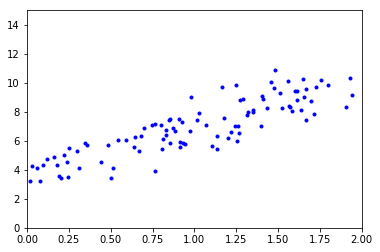

In [117]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [118]:
X_b = np.c_[np.ones((100, 1)), X] # ajout du biais
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.74807083],
       [3.2074838 ]])

In [37]:
# test avec 2 exemples
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.29089269],
       [9.73984771]])

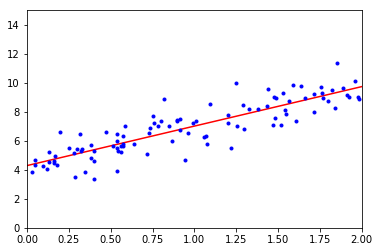

In [38]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Linear regression from scratch

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
preds = model.predict(X)

mae = (1/X.shape[0]) * np.sum(np.abs(preds - y))
mae

0.6970810414450161

In [300]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin, ClusterMixin, TransformerMixin
from sklearn.model_selection import train_test_split

class Linear_Regressor(BaseEstimator, RegressorMixin):
    """
    - X : shape = m,n
    - y : shape = m,1
    """
    def __init__(self,batch_size=32, learning_rate=0.003, nb_iter=10000):
        self.learning_rate = learning_rate
        self.nb_iter = nb_iter
        self.batch_size = batch_size
        
    # perform Stochiastic Gradient Descent   
    def fit(self, X, y=None, verbose = True):
        
        m = X.shape[0] # nb training exemple
        n = X.shape[1] + 1 # nb features + intercept
        
        # ajout intercept
        X_b = np.c_[np.ones((m,1)),X]
        
        # separation set d'apprentissage / validation
        # random initialization theta
        self.theta = np.random.rand(n,1)
        
        for epoch in range(self.nb_iter):
            
            idx = np.random.randint(0,high=m,size = self.batch_size)
            # compute predictions 
            preds = self.predict(X_b[idx,:],theta)

            # compute gradients
            grads = (2/self.batch_size) * X_b[idx,:].T.dot(preds - y[idx])
            print(grads)
            # update weights
            self.theta -= self.learning_rate * grads
            
    def predict(self, X, y=None):
        if X.shape[1] < self.theta.shape[0]:
            X = np.c_[np.ones((X.shape[0],1)),X]
        return X.dot(self.theta)
    def cost(self,X,y):
        
        return None
    
    def score(self, X, y=None, metrics = 'MAE'):
        return (1/X.shape[0]) * np.sum(np.abs(self.predict(X) - y))

In [301]:
m = 10000


X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

In [302]:
lin_reg = Linear_Regressor(learning_rate=0.03,nb_iter=2, batch_size=32)

lin_reg.fit(X,y)
#y_pred = lin_reg.predict(X)
print('MAE=',lin_reg.score(X,y))

[[-11.90438427]
 [-13.15700644]]
[[-11.60580149]
 [-14.40462162]]
MAE= 4.417709037387427


In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate':[0.003, 0.01, 0.03], 'nb_iter':[300,1000,3000,10000], 'batch_size':[1,16,32,64]}
]

lin_reg = Linear_Regressor()
grid_search = GridSearchCV(lin_reg,param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_error')
grid_search.fit(X,y)
grid_search.best_estimator_

Linear_Regressor(batch_size=64, learning_rate=0.003, nb_iter=10000)

In [243]:
print('RMSE:',np.sqrt(-grid_search.best_score_))
print(grid_search.best_estimator_.theta)

RMSE: 0.9941275756432331
[[4.00308717]
 [2.9935882 ]]


# polynomial regression

In [259]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [260]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_features.fit_transform(X)
print('X:',X[0],'/ X**2:',X_poly[0])

X: [1.82688588] / X**2: [1.82688588 3.33751201]


In [261]:
lin_reg = Linear_Regressor()
lin_reg.fit(X_poly,y)
lin_reg.score(X_poly,y)

0.8259610532356998

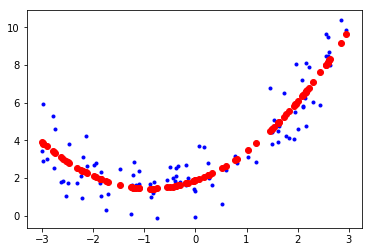

In [262]:
plt.plot(X,y,'b.')
plt.plot(X,lin_reg.predict(X_poly),'ro')
plt.show()

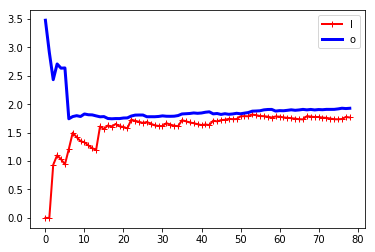

In [266]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend('lower right')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

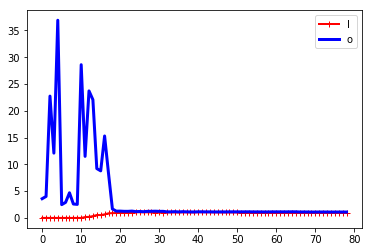

In [267]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)
#These learning curves look a bit like the previous ones, 

#### Bias 
* Cette partie de l'erreur est due à de mauvaises hypothèses, comme supposer par exemple que les données sont linéaires alors qu'elles sont quadratiques. = Underfitting.

#### Variance
* Haute sensibilité du modèle aux petites variations dans le set d'apprenstissage. Overfitting : il faut + de donnees, regulariser le modèle ou diminuer la complexité du modele

#### Erreur irreductible
* Bruit dans les données que le modèle va reproduire. Pour l'eviter il faut nettoyer à la mains les données.


In [309]:
from sklearn.base import BaseEstimator,clone, ClassifierMixin, RegressorMixin, ClusterMixin, TransformerMixin
from sklearn.model_selection import train_test_split

class Linear_Regressor(BaseEstimator, RegressorMixin):
    """
    - X : shape = m,n
    - y : shape = m,1
    """
    def __init__(self,batch_size=32, learning_rate=0.003, nb_iter=10000, penalty=None):
        self.learning_rate = learning_rate
        self.nb_iter = nb_iter
        self.batch_size = batch_size
        self.penalty = penalty
        
    # perform Stochiastic Gradient Descent   
    def fit(self, X, y=None, verbose = True):
        
        m = X.shape[0] # nb training exemple
        n = X.shape[1] # nb features + intercept
        
        
        # separation set d'apprentissage / validation
        # random initialization w et b
        self.w = np.random.randn(n,1)
        self.b = np.random.randn(1)
        for epoch in range(self.nb_iter):
            
            idx = np.random.randint(0,high=m,size = self.batch_size)
            # compute predictions 
            preds = self.predict(X[idx])
            # compute gradients
            w_grads = (2/self.batch_size) * X[idx].T.dot(preds - y[idx])
            b_grads = (2/self.batch_size) * np.sum(preds - y[idx])
            
            # update weights
            self.b -= self.learning_rate * b_grads
            self.w -= self.learning_rate * w_grads
            
    def predict(self, X, y=None):
        return X.dot(self.w) + self.b
    
    def cost(self,X,y):
        
        return None
    
    def score(self, X, y=None, metrics = 'MAE'):
        return (1/X.shape[0]) * np.sum(np.abs(self.predict(X) - y))

In [310]:
m = 10000


X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

lin_reg = Linear_Regressor(learning_rate=0.03,nb_iter=1000, batch_size=32, penalty=None)

lin_reg.fit(X,y)
#y_pred = lin_reg.predict(X)
print('MAE=',lin_reg.score(X,y))

MAE= 0.796610896161772


In [ ]:
# Early Stopping : 
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(nb_iter=1, warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# lRegression Logistique

In [319]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

In [322]:
from sklearn.linear_model import LogisticRegression

sgd_clf = LogisticRegression(multi_class='multinomial', solver="lbfgs", C=10)
sgd_clf.fit(X,y)
sgd_clf.score(X,y)

0.96